In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin1')
data.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/sms-spam-collection-dataset/spam.csv'

In [ ]:
data = data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data = data.rename(columns = {'v1':'Category','v2':'sms'})
data

,Category,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])

data

,Category,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   int64 
 1   sms       5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


Category
0    4516
1     653
Name: count, dtype: int64

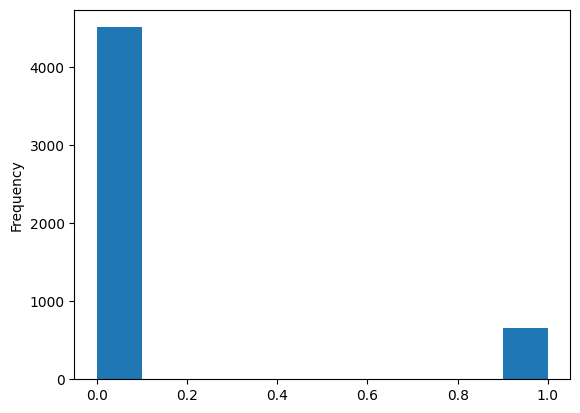

In [ ]:
import matplotlib.pyplot as plt

data.Category.plot.hist()
data.Category.value_counts()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#determining the number of characters
data['No_of_characters'] = data['sms'].apply(len)
data

/tmp/ipykernel_18/3958065833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_characters'] = data['sms'].apply(len)


,Category,sms,No_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
data['No_of_words'] = data['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
data

/tmp/ipykernel_18/641815785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_words'] = data['sms'].apply(lambda x:len(nltk.word_tokenize(x)))


,Category,sms,No_of_characters,No_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [ ]:
data['No_of_sentences'] = data['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))
data

/tmp/ipykernel_18/902026475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_sentences'] = data['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Category,sms,No_of_characters,No_of_words,No_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
data[data['Category']==1][['No_of_characters','No_of_words','No_of_sentences']].describe()

,No_of_characters,No_of_words,No_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<Axes: >

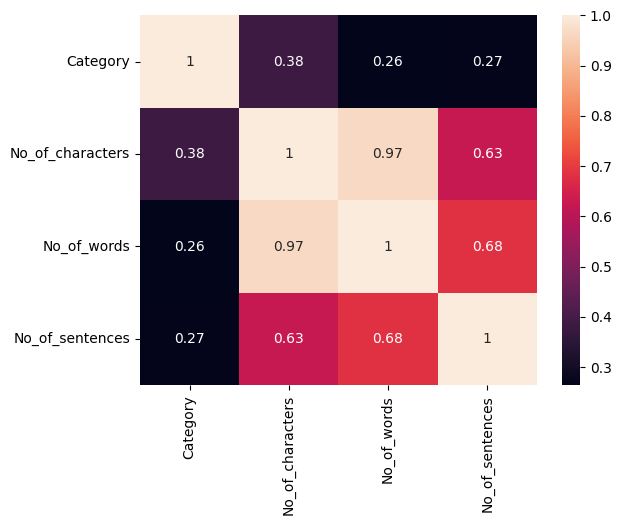

In [ ]:
import seaborn as sns
new = data.drop(columns = 'sms')
sns.heatmap(new.corr(),annot = True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    x = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
            
    y = x[:]
    x =[]
    for i in y:
        x.append(ps.stem(i))
        
    return " ".join(x)

In [ ]:
data['Transformed'] = data['sms'].apply(transform_text)

/tmp/ipykernel_18/3297754659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transformed'] = data['sms'].apply(transform_text)


In [ ]:
data

,Category,sms,No_of_characters,No_of_words,No_of_sentences,Transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


<Axes: title={'center': 'Correlation with the variables'}>

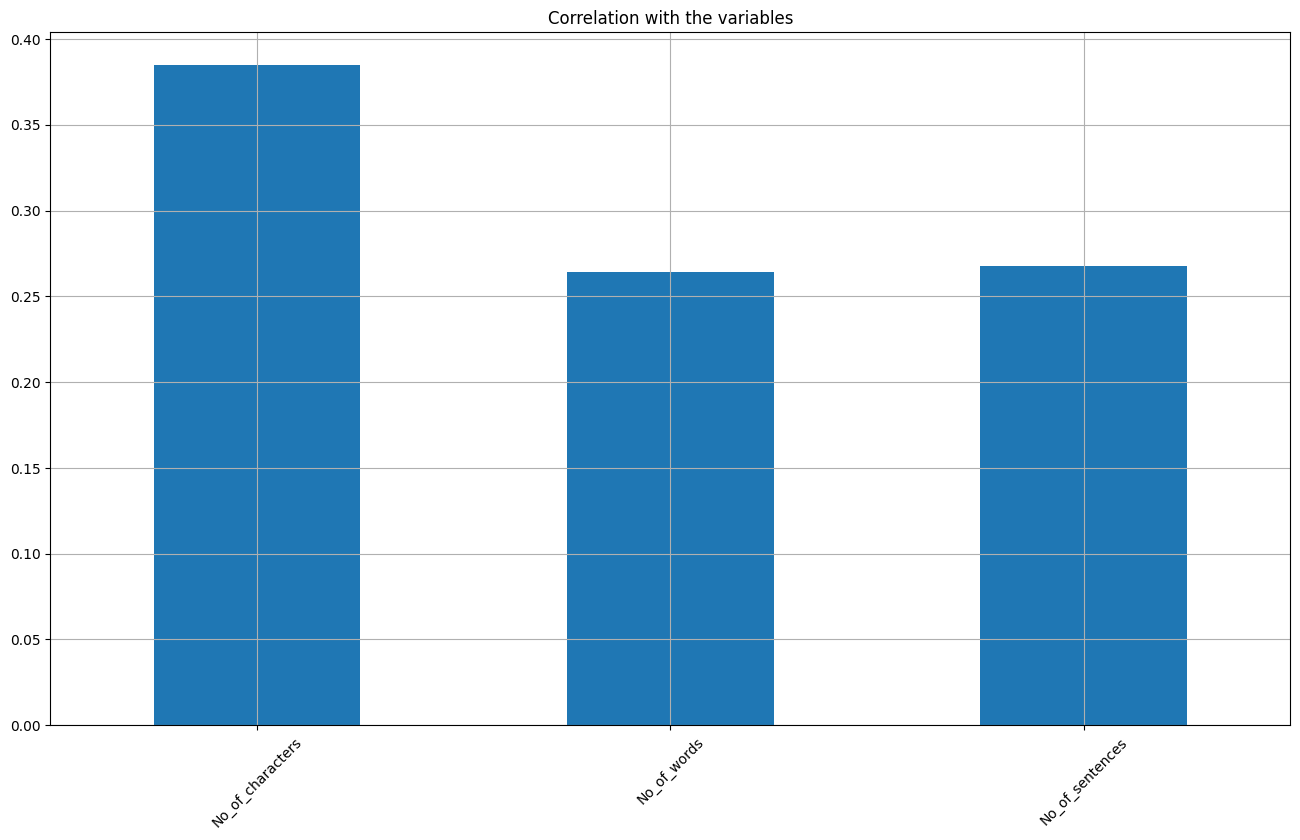

In [ ]:
data[['No_of_characters','No_of_words','No_of_sentences']].corrwith(data['Category']).plot.bar(figsize=(16,9), title = 'Correlation with the variables', rot =45, grid=True)

In [ ]:
spam_corpus = []
for elem in data['Transformed'][data['Category']==1].to_list():
    for word in elem.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9883

<Axes: xlabel='0', ylabel='1'>

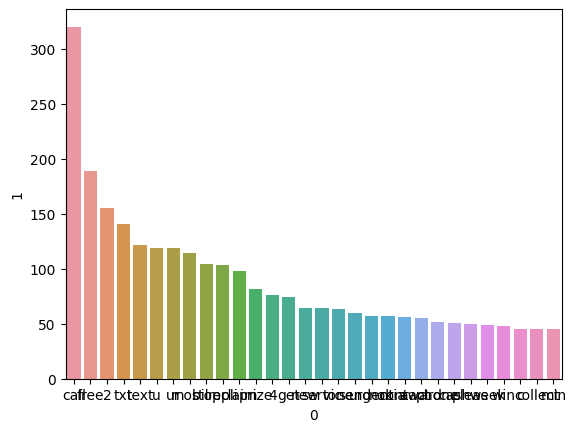

In [ ]:
from collections import Counter
import seaborn as sns
word = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x = word[0], y = word[1],)

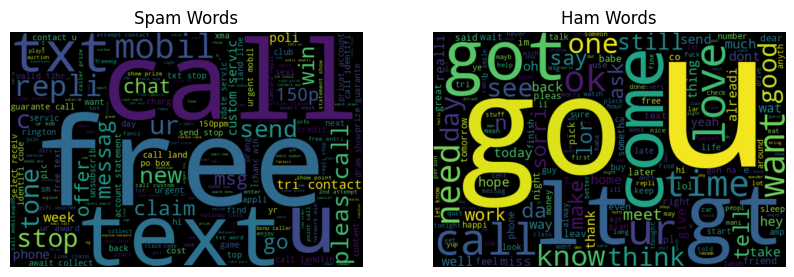

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create separate word clouds for spam and ham messages
spam_words = ' '.join(list(data[data['Category'] == 1]['Transformed']))
ham_words = ' '.join(list(data[data['Category'] == 0]['Transformed']))

# Generate word clouds
spam_wordcloud = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color='black').generate(ham_words)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Words')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Words')

plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Transformed']).toarray()
X.shape


(5169, 6629)

In [ ]:
y = data['Category'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create different Naive Bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Fit the models with the training data
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

# Calculate the accuracy scores for each model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

# Print the accuracy scores
print("Gaussian Naive Bayes accuracy:", accuracy_gnb)
print("Multinomial Naive Bayes accuracy:", accuracy_mnb)
print("Bernoulli Naive Bayes accuracy:", accuracy_bnb)

Gaussian Naive Bayes accuracy: 0.8597678916827853
Multinomial Naive Bayes accuracy: 0.9729206963249516
Bernoulli Naive Bayes accuracy: 0.9661508704061895


In [ ]:
from sklearn.metrics import precision_score

# Calculate the precision scores for each model
precision_gnb = precision_score(y_test, y_pred_gnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
precision_bnb = precision_score(y_test, y_pred_bnb)

# Print the precision scores
print("Gaussian Naive Bayes precision:", precision_gnb)
print("Multinomial Naive Bayes precision:", precision_mnb)
print("Bernoulli Naive Bayes precision:", precision_bnb)


Gaussian Naive Bayes precision: 0.5
Multinomial Naive Bayes precision: 0.8874172185430463
Bernoulli Naive Bayes precision: 0.9661016949152542


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=3000)

# Fit and transform the transformed text data
X = vectorizer.fit_transform(data['Transformed'])

# Convert the sparse matrix to a dense array
X = X.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create different Naive Bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Fit the models with the training data
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

# Calculate the accuracy scores for each model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

# Print the accuracy scores
print("Gaussian Naive Bayes accuracy:", accuracy_gnb)
print("Multinomial Naive Bayes accuracy:", accuracy_mnb)
print("Bernoulli Naive Bayes accuracy:", accuracy_bnb)


Gaussian Naive Bayes accuracy: 0.851063829787234
Multinomial Naive Bayes accuracy: 0.971953578336557
Bernoulli Naive Bayes accuracy: 0.9738878143133463


In [ ]:
# Calculate the precision scores for each model
precision_gnb = precision_score(y_test, y_pred_gnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
precision_bnb = precision_score(y_test, y_pred_bnb)

# Print the precision scores
print("Gaussian Naive Bayes precision:", precision_gnb)
print("Multinomial Naive Bayes precision:", precision_mnb)
print("Bernoulli Naive Bayes precision:", precision_bnb)


Gaussian Naive Bayes precision: 0.4819277108433735
Multinomial Naive Bayes precision: 0.9915254237288136
Bernoulli Naive Bayes precision: 0.9758064516129032


In [ ]:
#maximum precision and accuracy is in Multinomial Native Bayes
import pickle
pickle.dump(vectorizer,open('Vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))